# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).




The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 


[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')





## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [2]:
dataFileName = os.path.join("data-a1","weather2.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

display(dataDF.head(5))




,id,date,tmax,tmin,prcp
0,AG000060390,1950-01-01,162,80,91
1,AG000060390,1950-01-02,129,74,153
2,AG000060390,1950-01-03,138,70,0
3,AG000060390,1950-01-04,163,68,0
4,AG000060390,1950-01-05,172,57,0


In [3]:
stationsFileName = os.path.join( "data-a1", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

display(stationsDF.head(5))




,id,lat,lon,alt,name,cid
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,AC
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,AC
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,AE
3,AF000040930,35.3170,69.0170,3366.0,NORTH-SALANG,AF
4,AG000060390,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,AG


In [4]:
regionsFileName = os.path.join( "data-a1", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

display(regionsDF.head(5))




,region,country,cid
0,North America,United States,US
1,Middle East,United Arab Emirates,AE
2,Africa,Ethiopia,ET
3,Africa,Algeria,AG
4,Asia,Kazakhstan,KZ


In [5]:
# Merge all tables
merged_tables = dataDF.merge(stationsDF, how = "inner").merge(regionsDF)




## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [6]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Largest 3 Temp
largest3_temp = dataDF["tmax"].nlargest(3)
result_largest_temp = dataDF[dataDF.index.isin(largest3_temp.index)]
print("Largest 3 Temperature: ")
display(result_largest_temp)
# Lowest 3 Temp
lowest3_temp = dataDF["tmin"].nsmallest(3)
result_lowest_temp = dataDF[dataDF.index.isin(lowest3_temp.index)]
print("Lowest 3 Temperature: ")
display(result_lowest_temp)
# Largest 3 Prcp
max_prcp = dataDF["prcp"].idxmax() # index des max prcp
result_max_prcp = dataDF.iloc[[max_prcp]]
print("Max Precipitation: ")
display(result_max_prcp)




Largest 3 Temperature: 


,id,date,tmax,tmin,prcp
1204170,KU000405820,1990-07-25,512,367,0
1205317,KU000405820,1995-08-14,510,281,0
1206314,KU000405820,1998-08-20,513,292,0


Lowest 3 Temperature: 


,id,date,tmax,tmin,prcp
258741,CA003050520,1950-01-02,-283,-461,0
258764,CA003050520,1950-01-25,-244,-512,0
279066,CA004057120,1950-01-25,-367,-461,0


Max Precipitation: 


,id,date,tmax,tmin,prcp
1706892,SA000041024,1978-04-05,335,249,7780


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [7]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Filter the specific station
lisbon_station = dataDF[dataDF["id"] == "PO000008535"]

# Largest Temp
largest3_lisbon = lisbon_station["tmax"].nlargest(3)
result_max_lisbon = lisbon_station[lisbon_station.index.isin(largest3_lisbon.index)].sort_values("tmax", ascending=False)
print("Largest 3 Temp: ")
display(result_max_lisbon)

# Lowest Temp
lowest3_lisbon = lisbon_station["tmin"].nsmallest(3)
result_lowest_lisbon = lisbon_station[lisbon_station.index.isin(lowest3_lisbon.index)].sort_values("tmin")
print("Lowest 3 Temp: ")
display(result_lowest_lisbon)

# Largest Prcp
max_prcp_lisbon = lisbon_station["prcp"].idxmax() # index des max prcp
result_max_prcp_lisbon = lisbon_station.loc[[max_prcp_lisbon]] # Search and show row of max index
print("Largest 3 Prcp: ")
display(result_max_prcp_lisbon)




Largest 3 Temp: 


,id,date,tmax,tmin,prcp
1515468,PO000008535,2018-08-04,420,281,0
1502268,PO000008535,1981-06-13,415,219,0
1505954,PO000008535,1991-07-17,406,246,0


Lowest 3 Temp: 


,id,date,tmax,tmin,prcp
1492278,PO000008535,1954-02-05,115,-9,0
1493014,PO000008535,1956-02-11,68,-8,0
1493015,PO000008535,1956-02-12,100,-8,0


Largest 3 Prcp: 


,id,date,tmax,tmin,prcp
1511648,PO000008535,2008-02-18,154,121,1024


### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [8]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Filter portugal
merged_tables2 = merged_tables[["id","date","tmax","tmin","prcp","name","cid","country"]]
portugal = merged_tables2[(merged_tables2["cid"]== "PO") & (merged_tables2["name"] == "LISBOA GEOFISICA")]

#Groupby year und df reducen all starting from year 1970 and above 30 degrees
lisbon_from_1970 = portugal[portugal["date"].dt.year >= 1970]
lisbon_from_1970_temp1 = lisbon_from_1970[lisbon_from_1970["tmax"] >= 300]
#display(lisbon_from_1970_temp1)

#Delete not necessary columns
lisbon_from_1970_temp2 = lisbon_from_1970_temp1.drop(columns= ["name", "country"])

#Give number of Days
lisbon_from_1970_temp3 = lisbon_from_1970_temp2.groupby(lisbon_from_1970_temp2["date"].dt.year).count()

result_lisbon_temp = lisbon_from_1970_temp3[["id"]].rename(columns={"id":"Number of days"})
display(result_lisbon_temp)




,Number of days
date,
1970,26
1971,17
1972,8
1973,22
1974,33
1975,18
1976,25
1977,16
1978,28


### 1.d) Print information about the top-10 days with the largest temperature difference?


In [9]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#New Column with temperature difference
dataDF["temp_diff"] = dataDF.tmax - dataDF.tmin

#Largest 10 Temperature Differences
largest10_temp_diff = dataDF["temp_diff"].nlargest(10)
result_largest_temp_diff = dataDF[dataDF.index.isin(largest10_temp_diff.index)].sort_values("temp_diff", ascending=False)
print("Largest 10 Temp_diff: ")
display(result_largest_temp_diff)




Largest 10 Temp_diff: 


,id,date,tmax,tmin,prcp,temp_diff
362484,CA008103100,1951-02-07,117,-250,8,367
300894,CA006105976,1950-03-04,17,-339,0,356
288881,CA004057120,1976-12-10,22,-328,0,350
378097,CA008103100,1994-01-28,95,-250,103,345
1206923,KZ000035188,1951-02-17,-50,-395,10,345
1287287,MG000044272,1988-02-24,102,-239,0,341
304093,CA006105976,1958-12-22,17,-322,36,339
370817,CA008103100,1974-01-21,72,-267,38,339
304145,CA006105976,1959-02-12,28,-306,0,334
323805,CA006105976,2013-01-18,98,-235,62,333


### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [10]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Max Temperature
#Groupby stations and set new index and filter starting from 1970
stations_from_1970 = dataDF[dataDF["date"].dt.year >= 1970]
group_stations1_tmax = stations_from_1970.groupby("id").max("tmax").sort_values("tmax", ascending=False)
group_stations2_tmax =group_stations1_tmax.reset_index()
result_stations_tmax = group_stations2_tmax.drop(columns =["tmin","prcp","temp_diff"])
print("Max Temperature of each station: ")
display(result_stations_tmax)

# Test if PO Station is included and groupby works well because of prcp max is equal 1024
station_portugal = group_stations2_tmax[group_stations2_tmax["id"]=="PO000008535"]

#Lowest Temperature
group_stations1_tmin = stations_from_1970.groupby("id").min("tmin")
group_stations2_tmin =group_stations1_tmin.reset_index()
result_stations_tmin = group_stations2_tmin.drop(columns =["tmax","prcp","temp_diff"]).sort_values("tmin")
print("Min Temperature of each station: ")
display(result_stations_tmin)

# Max Precipitation
group_stations1_max_prcp = stations_from_1970.groupby("id").max("prcp").sort_values("prcp", ascending=False)
group_stations2_max_prcp =group_stations1_max_prcp.reset_index()
result_stations_max_prcp = group_stations2_max_prcp.drop(columns =["tmin","tmax","temp_diff"])
print("Max Precipitation of each station: ")
display(result_stations_max_prcp)





Max Temperature of each station: 


,id,tmax
0,KU000405820,513
1,CT000004656,498
2,SA000041024,490
3,PK000041640,490
4,SY000040061,483
...,...,...
125,UK000003026,263
126,IC000004097,258
127,IC000004030,257
128,UK000003005,234


Min Temperature of each station: 


,id,tmin
14,CA004057120,-461
13,CA003050520,-430
68,KZ000035188,-428
72,MG000044272,-427
96,RSM00027612,-380
...,...,...
112,TH000048564,139
93,RPW00041231,161
38,GB000004500,178
77,MY000096413,189


Max Precipitation of each station: 


,id,prcp
0,SA000041024,7780
1,GB000004501,5001
2,MR000001442,4940
3,CS000081003,4900
4,AR000087129,4630
...,...,...
125,NO000001026,500
126,DA000030380,483
127,NO000099710,421
128,RSM00022907,416


## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


<AxesSubplot:title={'center':'Trend of weather station in Germany 2 years 2018 and 2019'}, xlabel='date'>

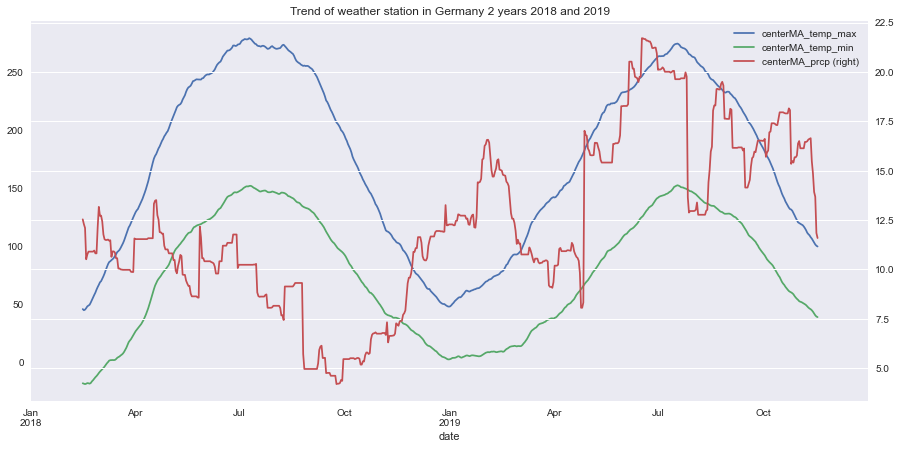

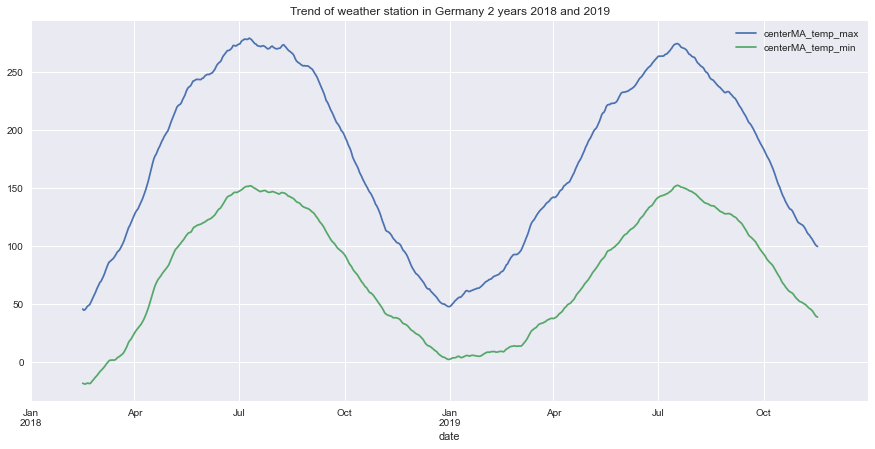

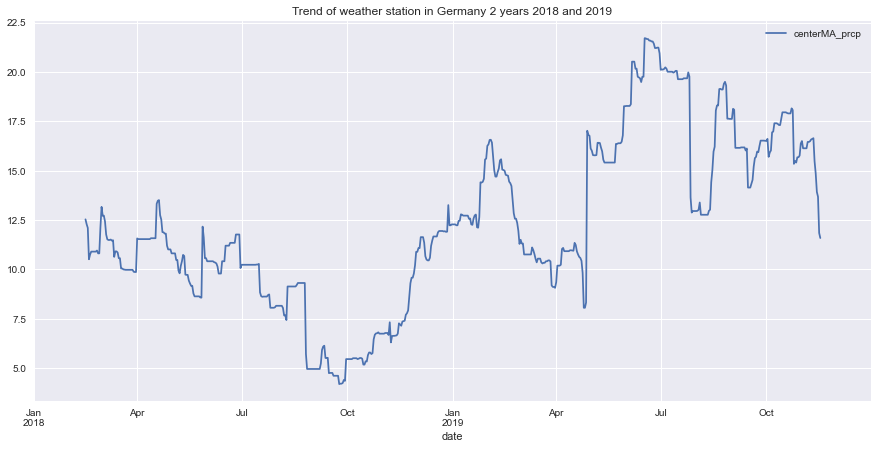

In [11]:
#Solve question here. Briefly justy your solution in the following markdown cell.
#First searching for the station in germany and build DF with selected country "germany"
germany = merged_tables[merged_tables["country"] == "Germany"]
germany_station = dataDF[dataDF["id"] == "GM000003342"]

#Build a DF with selected year 18_19
ger_station_18_19 = germany_station[(germany_station["date"].dt.year >= 2018) & 
                                    (germany_station["date"].dt.year <= 2019)].copy()
#ger_station_18_19 = germany_station[germany_station["date"].dt.year == 2018].copy() # --> Nur 2018 oder 2018 und 2019???
# Smoothing chart with moving average centered
ger_station_18_19["centerMA_temp_max"] = ger_station_18_19["tmax"].rolling(90,center=True).mean()
ger_station_18_19["centerMA_temp_min"] = ger_station_18_19["tmin"].rolling(90,center=True).mean()
ger_station_18_19["centerMA_prcp"] = ger_station_18_19["prcp"].rolling(90,center=True).mean()
ger_station_18_19["centerMA_temp_diff"] = ger_station_18_19["temp_diff"].rolling(90,center=True).mean()


# Plot the lines of the weather elements chart to figure out the trend
ger_station_18_19.plot(x= "date", y =["centerMA_temp_max","centerMA_temp_min","centerMA_prcp"],
                       secondary_y=["centerMA_prcp"], figsize = (15,7),
                       title="Trend of weather station in Germany 2 years 2018 and 2019")
# Plot and compare just tmax and tmin
ger_station_18_19.plot(x= "date", y =["centerMA_temp_max","centerMA_temp_min"], figsize = (15,7),
                       title="Trend of weather station in Germany 2 years 2018 and 2019")

#Plot the precipitaion
ger_station_18_19.plot(x= "date", y =["centerMA_prcp"], figsize = (15,7),
                       title="Trend of weather station in Germany 2 years 2018 and 2019")





**Rationale:** 

At the beginning I searched for a station by choosing a country and filtering the id of the weather station.
Then I filtered the dataframe by the years 2018 up to and including 2019.
So that the granularity of the data does not influence the curves too much and represent too unsteady I have decided for the centered smoothing average. I assumed the length of a quarter for k=90 and formed it via the center. The quarter ensures that the data do not depend too much on the days and generate a clean trend. For a trend over two years, the assumption of quarters is a good solution as you can see from the smoothe graphs.
I have shown the min temperature, max temperature and the precipitation in a graph and for clarity I have also created a graph with the temperatures only.

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

Plot the simpleMA temp_diff of both stations of different continents in africa and the US in one chart: 


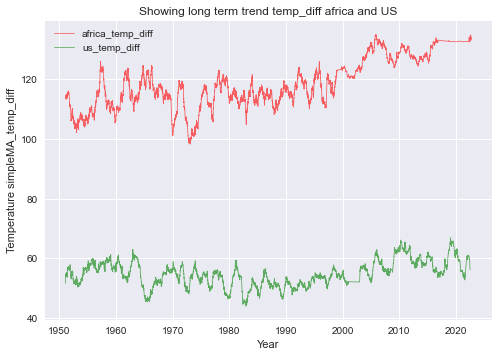

Plot the simpleMA temperature of both stations of different continents in africa and the US in one chart: 


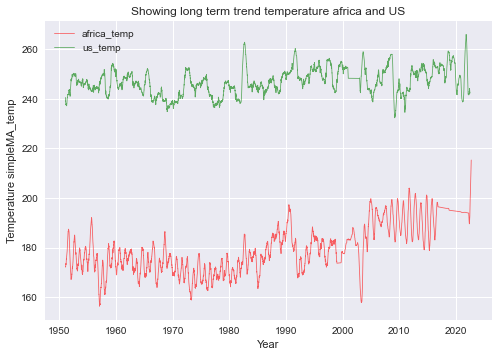

Plot the simpleMA precipitation of both stations of different continents in africa and the US in one chart: 


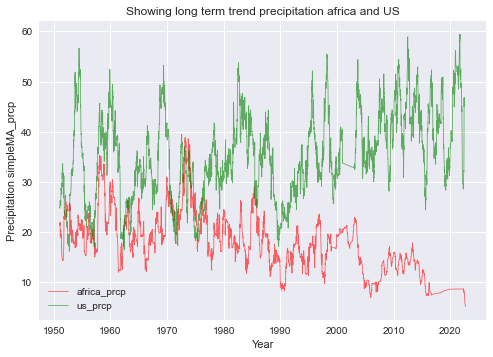

In [12]:
#Solve question here. Briefly justy you solution in the following markdown cell.
#merged_tables drop not necassary columns and filter two stations on two diff continents Africa and North America in diff dfs
merged_tables1 = merged_tables.drop(columns=["lat","lon","alt","name"])
station_africa = merged_tables1[["id","date","tmax","tmin","prcp"]][merged_tables1["id"] == "AG000060390"].copy()
station_us = merged_tables1[["id","date","tmax","tmin","prcp"]][merged_tables1["id"] == "USW00092811"].copy()

#Add new Column and Calculate average between tmax and tmin by both new df of africa and us
station_africa["avg_temp"] = station_africa[["tmax","tmin"]].mean(axis=1)
station_us["avg_temp"] = station_us[["tmax","tmin"]].mean(axis=1)

#Add new Column and Calculate difference between tmax and tmin
station_africa["temp_diff"] = station_africa["tmax"]-station_africa["tmin"]
station_us["temp_diff"] = station_us["tmax"]-station_us["tmin"]

#simple moving average of temp_diff
station_us["simpleMA_temp_diff"] = station_us["temp_diff"].rolling(365,center=False).mean()
station_africa["simpleMA_temp_diff"] = station_africa["temp_diff"].rolling(365,center=False).mean()


#Calculate and smooth average with moving average of both stations
station_africa["simpleMA_temp"] = station_africa["avg_temp"].rolling(365,center=False).mean()
station_us["simpleMA_temp"] = station_us["avg_temp"].rolling(365,center=False).mean()

'''
First plot the trends between two countries in one graph to get an overview about the trends 
before starting to calculate and plot the Regression analysis
'''

# Plot simpleMA temp_diff of both continents in one plot
plt.plot(station_africa["date"], station_africa["simpleMA_temp_diff"], color="r", label="africa_temp_diff",
         alpha=0.6,linewidth=0.8)
plt.plot(station_us["date"], station_us["simpleMA_temp_diff"], color="g", label="us_temp_diff",alpha=0.6,linewidth=0.8)
plt.title("Showing long term trend temp_diff africa and US")
plt.xlabel("Year")
plt.ylabel("Temperature simpleMA_temp_diff")
plt.legend()
print("Plot the simpleMA temp_diff of both stations of different continents in africa and the US in one chart: ", end="\n")
plt.show()

# Plot simpleMA temperature of both continents in one plot
plt.plot(station_africa["date"], station_africa["simpleMA_temp"], color="r", label="africa_temp",alpha=0.6,linewidth=0.8)
plt.plot(station_us["date"], station_us["simpleMA_temp"], color="g", label="us_temp",alpha=0.6,linewidth=0.8)
plt.title("Showing long term trend temperature africa and US")
plt.xlabel("Year")
plt.ylabel("Temperature simpleMA_temp")
plt.legend()
print("Plot the simpleMA temperature of both stations of different continents in africa and the US in one chart: ", end="\n")
plt.show()

#Add simpleMA_prcp for precipitation in the US and africa
station_africa["simpleMA_prcp"] = station_africa["prcp"].rolling(365,center=False).mean()
station_us["simpleMA_prcp"] = station_us["prcp"].rolling(365,center=False).mean()

# Plot precipitation of afriac and US in one plot
# Plot both continent in one plot
plt.plot(station_africa["date"], station_africa["simpleMA_prcp"], color="r", label="africa_prcp",alpha=0.6,linewidth=0.8)
plt.plot(station_us["date"], station_us["simpleMA_prcp"], color="g", label="us_prcp",alpha=0.6,linewidth=0.8)
plt.title("Showing long term trend precipitation africa and US")
plt.xlabel("Year")
plt.ylabel("Precipitation simpleMA_prcp")
plt.legend()
print("Plot the simpleMA precipitation of both stations of different continents in africa and the US in one chart: ",
      end="\n")
plt.show()





## Regression Analysis of the both countries

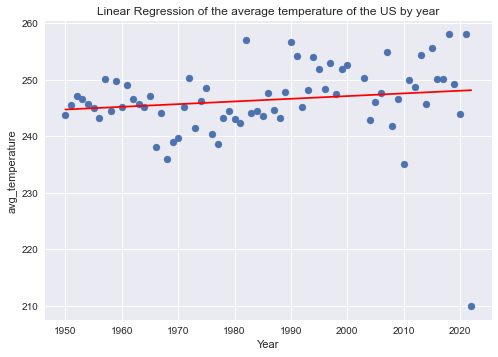

theta0 =  [152.16958347]
theta1 =  [[0.04747636]]


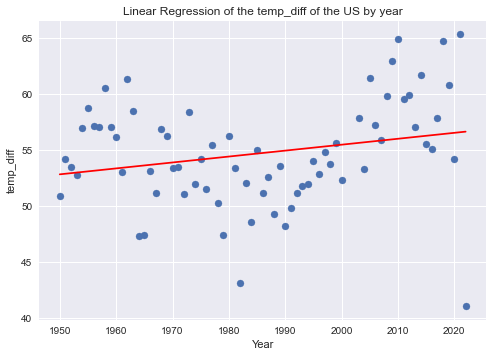

theta0 =  [-50.62241386]
theta1 =  [[0.05305309]]


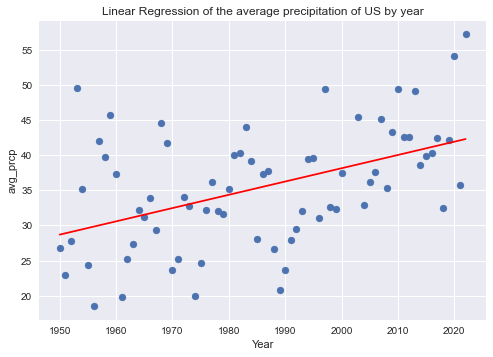

theta0 =  [-339.71525618]
theta1 =  [[0.18892769]]


In [13]:
'''
Plot the Regression analysis to get further informations about the trend 
and further development of the trends in the future
'''
from sklearn import linear_model

# Data calculations before plotting
# Group the day datapoints by year
group_year_us = station_us.groupby(merged_tables["date"].dt.year).mean().reset_index()
group_year_africa = station_africa.groupby(merged_tables["date"].dt.year).mean().reset_index()

# assign x_feature and y_labels for Africa temperature
x_feature_africa_temp = group_year_africa[["date"]]
y_labels_africa_temp = group_year_africa[["avg_temp"]]
z_labels_africa_temp_diff = group_year_africa[["temp_diff"]]

# assign x_feature and y_labels for the US temperature
x_feature_us_temp = group_year_us[["date"]]
y_labels_us_temp = group_year_us[["avg_temp"]]
z_labels_us_temp_diff = group_year_us[["temp_diff"]]

# assign x_feature and y_labels for the US prcp
x_feature_us_prcp = group_year_us[["date"]]
y_labels_us_prcp = group_year_us[["prcp"]]

# assign x_feature and y_labels for Africa prcp
x_feature_africa_prcp = group_year_africa[["date"]]
y_labels_africa_prcp = group_year_africa[["prcp"]]

#Plot the regression analysis for US

# Regression average temperature US
#display theta0 and theta1 the two parameters of the linear regression
body_reg_us_temp = linear_model.LinearRegression()
body_reg_us_temp.fit(x_feature_us_temp, y_labels_us_temp)

# theta0 is the last parameter in linear regression
# theta1 can be more then one parameter thats why two parenthesis (list)

yx_us_temp = body_reg_us_temp.predict(x_feature_us_temp)
x_feature_np_us_temp= np.array(x_feature_us_temp)

plt.scatter(x_feature_np_us_temp, y_labels_us_temp)
plt.plot(x_feature_np_us_temp, yx_us_temp, "red")
plt.title("Linear Regression of the average temperature of the US by year")
plt.xlabel("Year")
plt.ylabel("avg_temperature")
plt.show()
print ("theta0 = ",body_reg_us_temp.intercept_)
print ("theta1 = ",body_reg_us_temp.coef_)

# Regression average temp_diff US
body_reg_us_temp_diff = linear_model.LinearRegression()
body_reg_us_temp_diff.fit(x_feature_us_temp, z_labels_us_temp_diff)

yx_us_temp_diff = body_reg_us_temp_diff.predict(x_feature_us_temp)
x_feature_np_us_temp_diff= np.array(x_feature_us_temp)

plt.scatter(x_feature_np_us_temp_diff, z_labels_us_temp_diff)
plt.plot(x_feature_np_us_temp_diff, yx_us_temp_diff, "red")
plt.title("Linear Regression of the temp_diff of the US by year")
plt.xlabel("Year")
plt.ylabel("temp_diff")
plt.show()
print ("theta0 = ",body_reg_us_temp_diff.intercept_)
print ("theta1 = ",body_reg_us_temp_diff.coef_)

# Regression average precipitation US

body_reg_us_prcp = linear_model.LinearRegression()
body_reg_us_prcp.fit(x_feature_us_prcp, y_labels_us_prcp)

yx_us_prcp = body_reg_us_prcp.predict(x_feature_us_prcp)
x_feature_np_us_prcp= np.array(x_feature_us_prcp)

plt.scatter(x_feature_np_us_prcp, y_labels_us_prcp)
plt.plot(x_feature_np_us_prcp, yx_us_prcp, "red")
plt.title("Linear Regression of the average precipitation of US by year")
plt.xlabel("Year")
plt.ylabel("avg_prcp")
plt.show()
print ("theta0 = ",body_reg_us_prcp.intercept_)
print ("theta1 = ",body_reg_us_prcp.coef_)





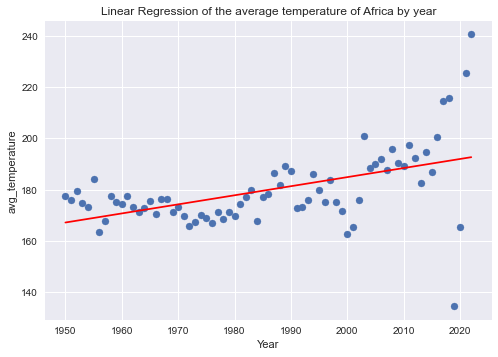

theta0 =  [-523.61999269]
theta1 =  [[0.35425364]]


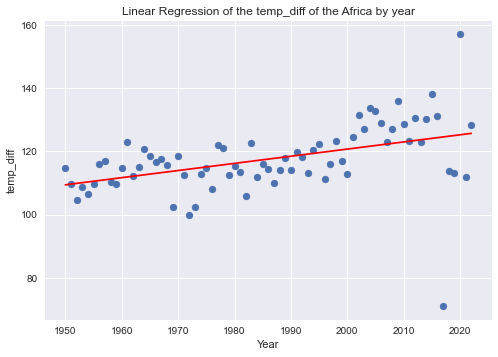

theta0 =  [-331.26108244]
theta1 =  [[0.22598724]]


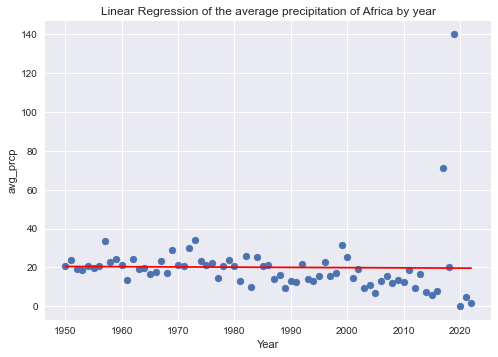

theta0 =  [44.09208994]
theta1 =  [[-0.01211006]]


In [14]:
#Plot the regression analysis for Africa

# Regression average temperature Africa
# Display theta0 and theta1 the two parameters of the linear regression
body_reg_africa_temp = linear_model.LinearRegression()
body_reg_africa_temp.fit(x_feature_africa_temp, y_labels_africa_temp)

yx_africa_temp = body_reg_africa_temp.predict(x_feature_africa_temp)
x_feature_np_africa_temp= np.array(x_feature_africa_temp)

plt.scatter(x_feature_np_africa_temp, y_labels_africa_temp)
plt.plot(x_feature_np_africa_temp, yx_africa_temp, "red")
plt.title("Linear Regression of the average temperature of Africa by year")
plt.xlabel("Year")
plt.ylabel("avg_temperature")
plt.show()
print ("theta0 = ",body_reg_africa_temp.intercept_)
print ("theta1 = ",body_reg_africa_temp.coef_)

# Regression average temp_diff US
body_reg_africa_temp_diff = linear_model.LinearRegression()
body_reg_africa_temp_diff.fit(x_feature_africa_temp, z_labels_africa_temp_diff)

yx_africa_temp_diff = body_reg_africa_temp_diff.predict(x_feature_africa_temp)
x_feature_np_africa_temp_diff= np.array(x_feature_africa_temp)

plt.scatter(x_feature_np_africa_temp_diff, z_labels_africa_temp_diff)
plt.plot(x_feature_np_africa_temp_diff, yx_africa_temp_diff, "red")
plt.title("Linear Regression of the temp_diff of the Africa by year")
plt.xlabel("Year")
plt.ylabel("temp_diff")
plt.show()
print ("theta0 = ",body_reg_africa_temp_diff.intercept_)
print ("theta1 = ",body_reg_africa_temp_diff.coef_)

# Regression average precipitation Africa
body_reg_africa_prcp = linear_model.LinearRegression()
body_reg_africa_prcp.fit(x_feature_africa_prcp, y_labels_africa_prcp)

yx_africa_prcp = body_reg_africa_prcp.predict(x_feature_africa_prcp)
x_feature_np_africa_prcp= np.array(x_feature_africa_prcp)

plt.scatter(x_feature_np_africa_prcp, y_labels_africa_prcp)
plt.plot(x_feature_np_africa_prcp, yx_africa_prcp, "red")
plt.title("Linear Regression of the average precipitation of Africa by year")
plt.xlabel("Year")
plt.ylabel("avg_prcp")
plt.show()
print ("theta0 = ",body_reg_africa_prcp.intercept_)
print ("theta1 = ",body_reg_africa_prcp.coef_)





**Rationale:** 


The linear regression is shown the trend by calculating the intercept and coefficient of an linear regression function y=mx+b

The Average temperature regarding the single station with id "AG000060390" in Africa and the station with id "USW00092811" in US have been increased on long term for just this two stations in the big countries. Africa at this station has an higher average temperature compared to the US. That can be seen in the first overview graphs.

- The average temperature in africa highly increased. In the US the average temperature just increased slowly till moderatly. That can be seen in the regression analysis regarding the high theta1 of 0.35 by Africa and the only 0.047 by the US.

- The precipitation in the US highly increased by 0.189 theta1 and in africa the situation do not changed over 70 years by theta1 equal to zero till slightly negativ with -0.012. So it is the other way round compared to the temperature.

- You can check the results by have a look to the regression analysis graphs and also to the overview plots which are shown the simpleMA of temperature and precipitation of africa and US. 

- Both types of graphs are to be considered because the overview graphs are shown the trend of the smoothed datapoints and the regression analysis is shown the the long term trend to support the prediction of the further development of precipitation and temperature in both countries by grouping the datapoints by years. 

- The overview graphs which are shown the ungrouped datapoints and the trend of simpleMA temperature and simpleMA precipitation which are comparing the temperature and precipitation of africa and US are confirming the results of the regression. But it is important to have a look and check the results because the grouped function can distort the graphs. 

- The regression is shown for africa and the US and the weather elements temperature, temperature difference and precipitation

Attention: Limitation of the results beacuse if consideration of just one station in whole Africa and US. Africa and US have differnet zones with extremily different temperatures.


theta0 = intercept --> But can not be explained in our example beacuse it doesnt make sense in our case. As shown by the highly negative values 

theta1 = coef --> Important in our case because it is shown the slope of the line and thus shwon how strong the elements are increasing



## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [15]:
#Solve question here. Briefly justy you solution in the following markdown cell.
#Figure out the name of the cities and choose one
merged_tables.name.unique()

# Select a city
hamburg = merged_tables[["id","date","tmax","tmin","prcp"]][merged_tables["name"] == "HAMBURG FUHLSBUETTEL"].copy()

# Correlation of weather elements
corr_weather_hamburg = hamburg.corr()
print("Correlations between weather elements in hamburg: \n")
display(corr_weather_hamburg)






Correlations between weather elements in hamburg: 



,tmax,tmin,prcp
tmax,1.000000,0.885575,0.036471
tmin,0.885575,1.000000,0.135868
prcp,0.036471,0.135868,1.000000


**Present an interpretation of the results here:** 

Assumption 1: I tested the dataset with the unique function and get that just one weather station of a specific city is included in the dataset.

Result:

- Correlation is calculating the relationship between different factors in that case the weather elements tmax,tin and prcp measured between 0 and 1. 

- Its shown that in hamburg is a strong positive correlation with 0.89 between tmin and tmax but a very weak correlation between temperature and precipitation. Thats normal because between temperature is a correlation in one city but between temperatuer and precipitation is not relationship. The precipitation depends of a huge amount of different factors except of the temperature

### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [16]:
#Solve question here. Briefly justy you solution in the following markdown cell.
# Select three cities
munich1 = merged_tables[["id","date","tmax","tmin","prcp"]][merged_tables["name"] == "MUENCHEN"].copy()
munich2 = munich1.rename(columns=
                          {"tmax":"tmax_munich","tmin":"tmin_munich", "prcp":"prcp_munich"})
munich3 = munich2.drop(columns="id")

berlin1 = merged_tables[["id","date","tmax","tmin","prcp"]][merged_tables["name"] == "BERLIN-DAHLEM"].copy()
berlin2 = berlin1.rename(columns={"tmax":"tmax_berlin","tmin":"tmin_berlin", "prcp":"prcp_berlin"})
berlin3 = berlin2.drop(columns="id")


melbourne1 = merged_tables[["id","date","tmax","tmin","prcp"]][merged_tables["name"] == "MELBOURNE REGIONAL OFFICE"].copy()
melbourne2 = melbourne1.rename(columns={"tmax":"tmax_melbourne","tmin":"tmin_melbourne", "prcp":"prcp_melbourne"})
melbourne3 = melbourne2.drop(columns="id")

# Merge dfs
selected_cities1 = munich3.merge(berlin3, on="date").merge(melbourne3, on="date")
selected_cities2 = selected_cities1.drop(columns="date")

# correlation calculation
corr_diff_cities = selected_cities2.corr()
print("Correlations between different cities: \n")
display(corr_diff_cities)





Correlations between different cities: 



,tmax_munich,tmin_munich,prcp_munich,tmax_berlin,tmin_berlin,prcp_berlin,tmax_melbourne,tmin_melbourne,prcp_melbourne
tmax_munich,1.000000,0.882243,0.065186,0.924077,0.862458,0.062650,-0.573229,-0.578491,-0.003856
tmin_munich,0.882243,1.000000,0.174941,0.864870,0.888808,0.114114,-0.578150,-0.583286,0.004230
prcp_munich,0.065186,0.174941,1.000000,0.109185,0.154168,0.150228,-0.108379,-0.104325,0.009507
tmax_berlin,0.924077,0.864870,0.109185,1.000000,0.909984,0.038181,-0.603197,-0.611278,-0.003102
tmin_berlin,0.862458,0.888808,0.154168,0.909984,1.000000,0.119258,-0.585394,-0.595040,0.005805
prcp_berlin,0.062650,0.114114,0.150228,0.038181,0.119258,1.000000,-0.051667,-0.044550,0.005467
tmax_melbourne,-0.573229,-0.578150,-0.108379,-0.603197,-0.585394,-0.051667,1.000000,0.704631,-0.155357
tmin_melbourne,-0.578491,-0.583286,-0.104325,-0.611278,-0.595040,-0.044550,0.704631,1.000000,-0.000476
prcp_melbourne,-0.003856,0.004230,0.009507,-0.003102,0.005805,0.005467,-0.155357,-0.000476,1.000000


**Rationale and comments:** 

Assumption1: 

I tested the dataset with the unique function and get that just one weather station of a specific city is included in the dataset.

Asssumption2:

Berlin and Munich could be highly correlating because both cities are loctated in the same region called Europe of our dataset and more important their weather conditions are both influenced by continental climate.
Source --> https://www.dwd.de/DE/service/lexikon/Functions/glossar.html?lv2=101334&lv3=101484

Assumption 3: 

I did an inner join to merge the three cities because I just need informations they are contained in all cities to compare each other.

#### Results:
- Strong significance is defined by correlation between 0.5 and 1.

- The results confirm that munich and berlin except from the far distance measured by kilometers have a strong positive  correlation between 0.8 and 0.94. The correlation of the precipitation is in that example low by a correltaion of only 0.1 till 0.2.

- It is intersting that the correlation of munich and berlin compared with melbourne is also medium and strong but negative correlated between 0.4 and 0.6 because of the opposite seasons. When summer starts in germany it is winter in melbourne.

#### Summary:

The location of Berlin and Munich in the continental climate zone is also confirmed by the strong correlation of temperatures. Precipitation, on the other hand, does not correlate strongly with each other. 
The strong negative correlations to Melbourne are well visible, because there it is winter when summer starts in Germany.
Thus, it correlates oppositely.

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [17]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#Higehst Temperature by region
grouped_region_tmax = merged_tables.groupby("region").max("tmax")
result_region_tmax = grouped_region_tmax[["tmax"]].sort_values("tmax", ascending=False)
result_region_tmax.reset_index(inplace=True)
print("Highest Temperature by region: \n")
display(result_region_tmax)
print()

# Lowest Temperature by region
grouped_region_tmin = merged_tables.groupby("region").min("tmin")
result_region_tmin = grouped_region_tmin[["tmin"]].sort_values("tmin", ascending=True)
result_region_tmin.reset_index(inplace=True)
print("Lowest Temperature by region: \n")
display(result_region_tmin)
print()

# Highest percipitation by region
grouped_region_maxprcp = merged_tables.groupby("region").max("prcp")
result_region_maxprcp = grouped_region_maxprcp[["prcp"]].sort_values("prcp", ascending=False)
result_region_maxprcp.reset_index(inplace=True)
print("Highest Percipitaion by region: \n")
display(result_region_maxprcp)




Highest Temperature by region: 



,region,tmax
0,Middle East,513
1,Africa,498
2,Asia,490
3,Australia/South Pacific,467
4,South/Central America & Carribean,456
5,Europe,442
6,North America,433



Lowest Temperature by region: 



,region,tmin
0,North America,-512
1,Asia,-440
2,Europe,-381
3,Middle East,-139
4,Africa,-85
5,South/Central America & Carribean,-85
6,Australia/South Pacific,-67



Highest Percipitaion by region: 



,region,prcp
0,Middle East,7780
1,Africa,5001
2,South/Central America & Carribean,4900
3,Asia,4549
4,Australia/South Pacific,3276
5,North America,2794
6,Europe,2000


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

Display computed average temperature by regions: 


,region,avg_temp
0,Africa,230.402476
1,South/Central America & Carribean,219.933030
2,Asia,188.256980
3,Middle East,180.452411
4,Australia/South Pacific,173.074830
5,North America,110.386748
6,Europe,98.987018



Plot the computed average temperature by regions: 


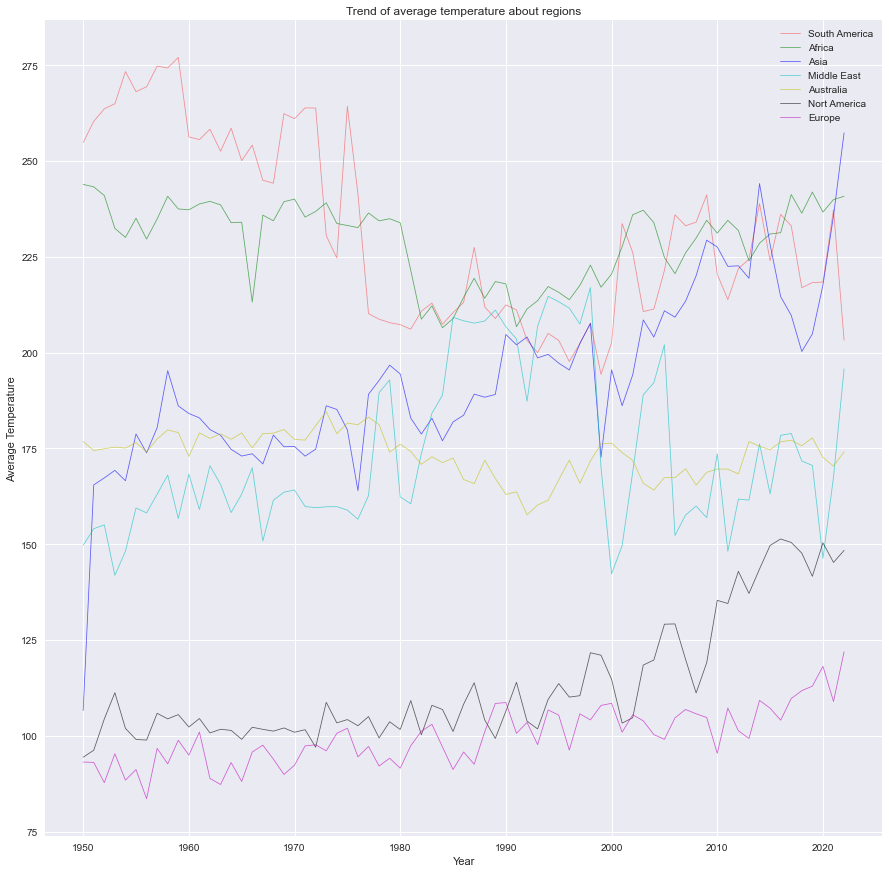

In [18]:
#Solve question here. Briefly justy you solution in the following markdown cell.

# First compute the average temperature by region in one table
# Grouped regions add column with average temp
selected_col = merged_tables[["tmax","tmin","region","date"]].copy()
selected_col["avg_temp"] = selected_col[["tmax","tmin"]].mean(axis=1) # Average Temp by day
avg_temp_regions = selected_col[["region","avg_temp"]]
group_avg_temp = avg_temp_regions.groupby("region").mean("avg_temp").sort_values("avg_temp", ascending = False)
group_avg_temp.reset_index(inplace = True)
print("Display computed average temperature by regions: ", end= "\n")
display(group_avg_temp)
print()

# Second plot the average temperature by region and consider the granularity of the data by grouping by year (Assumption: year)
#Create the trend of average temp for each region


# Add column avg_temp for each datapoint
merged_tables["avg_temp"] = merged_tables[["tmax","tmin"]].mean(axis=1)

# Create DFs for each region
SouthCentralAmericaCarribean = merged_tables[merged_tables["region"] == "South/Central America & Carribean"]
Africa = merged_tables[merged_tables["region"] == "Africa"]
Asia = merged_tables[merged_tables["region"] == "Asia"]
MiddleEast = merged_tables[merged_tables["region"] == "Middle East"]
AustraliaSouthPacific = merged_tables[merged_tables["region"] == "Australia/South Pacific"]
NorthAmerica = merged_tables[merged_tables["region"] == "North America"]
Europe = merged_tables[merged_tables["region"] == "Europe"]

# Group each regions by date for display the trend
group_south_america = SouthCentralAmericaCarribean.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_africa = Africa.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_asia = Asia.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_middle_east = MiddleEast.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_astralia = AustraliaSouthPacific.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_north_america = NorthAmerica.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_europe = Europe.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()

# Plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

f = plt.plot(group_south_america["date"],group_south_america["avg_temp"], color ="r", label ="South America",
             alpha=0.4,linewidth=0.8)
f = plt.plot(group_africa["date"],group_africa["avg_temp"], color ="g", label ="Africa",alpha=0.6,linewidth=0.8)
f = plt.plot(group_asia["date"],group_asia["avg_temp"], color ="b", label ="Asia",alpha=0.6,linewidth=0.8)
f = plt.plot(group_middle_east["date"],group_middle_east["avg_temp"], color ="c", label ="Middle East",alpha=0.6,
             linewidth=0.8)
f = plt.plot(group_astralia["date"],group_astralia["avg_temp"], color ="y", label ="Australia",alpha=0.6,linewidth=0.8)
f = plt.plot(group_north_america["date"],group_north_america["avg_temp"], color ="k", label ="Nort America",alpha=0.6,
             linewidth=0.8)
f = plt.plot(group_europe["date"],group_europe["avg_temp"], color ="m", label ="Europe",alpha=0.6,linewidth=0.8)


f = plt.ylabel("Average Temperature")
f = plt.xlabel("Year")
f = plt.title("Trend of average temperature about regions")
f = plt.legend()
print("Plot the computed average temperature by regions: ", end= "\n")
f = plt.show()




**Rationale:** 

First I computed the average temperature in an additonal column. Afterwards the data is grouped by six regions.
In the table is visualized the six regions and their average temperature.
Afterwards the regions are stored in different dataframes and and grouped by years to display the trend of regions in one graph.

The Results display a good overview about the expected results that Africa has the highest temperature and Europe the lowest.

It is shown through the earthwarming that the temperature in colder and moderate climate zones are increasing as Europe, North America and Asia and in warmer regions as africa, south america are volatile and has an negative trend execpt from africa from 2000 is increasing again.

Starting from 2000, an upward slope can be seen at each curve. In Australia, for example, only a small slope, but in Europe and North America a strong increase in temperature. This confirms the research concerning the rising temperatures and the global warming. Furthermore, new record highs in temperature are currently being measured every summer.

At the end the strong reaction can be explained through outlieres. It depends at which point of time the collection of data ends.

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


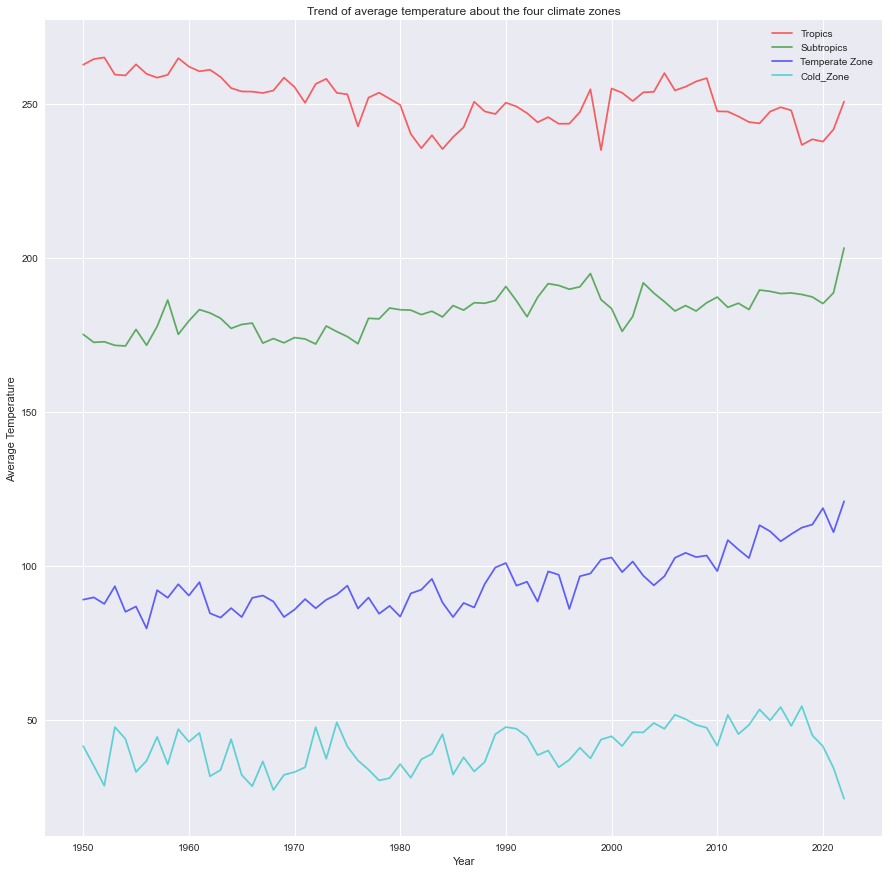

In [19]:
#Solve question here. Briefly justify you solution in the following markdown cell.
#Source: https://www.helpster.de/breitengrade-der-erde-wissenswertes-zu-den-klimazonen_136615
#https://scijinks.gov/climate-zones/

# Split the world in following weather regions tropics, subtropics, temperate zone and cold zone and create seperat DFs

tropics = merged_tables[(merged_tables["lat"]<=23.5) & (merged_tables["lat"]>= -23.5)]
subtropics = merged_tables[((merged_tables["lat"]>23.5) & (merged_tables["lat"]<= 40)) | ((merged_tables["lat"]<-23.5) &
                          (merged_tables["lat"]>=-40))]
temperate_zone = merged_tables[((merged_tables["lat"]>40) & (merged_tables["lat"]<= 60)) | ((merged_tables["lat"]<-40) &
                          (merged_tables["lat"]>=-60))]
cold_zone = merged_tables[(merged_tables["lat"]>60) | (merged_tables["lat"]<-60)]

# Groupby on year
group_tropics = tropics.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_subtropics = subtropics.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_temperate_zone = temperate_zone.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()
group_cold_zone = cold_zone.groupby(merged_tables["date"].dt.year).mean("avg_temp").reset_index()

# Plot the climate zones
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

f = plt.plot(group_tropics["date"],group_tropics["avg_temp"], color ="r", label ="Tropics",alpha=0.6)
f = plt.plot(group_subtropics["date"],group_subtropics["avg_temp"], color ="g", label ="Subtropics",alpha=0.6)
f = plt.plot(group_temperate_zone["date"],group_temperate_zone["avg_temp"], color ="b", label ="Temperate Zone",alpha=0.6)
f = plt.plot(group_cold_zone["date"],group_cold_zone["avg_temp"], color ="c", label ="Cold_Zone",alpha=0.6)



f = plt.ylabel("Average Temperature")
f = plt.xlabel("Year")
f = plt.title("Trend of average temperature about the four climate zones")
f = plt.legend()
f = plt.show()





**Rationale:** 

#### Split the world in following weather regions tropics, subtropics, temperate zone and cold zone :

Tropics: 
The tropics are located near the equator, between 0° and 23.5° south and north latitudes of the hemisphere. Here the solar radiation is the highest and therefore the climate is the warmest.

Subtropics:
The subtropics settle between 23.5° and 40° of southern and northern latitude of the hemisphere. The angle of incidence of the sun's rays is already lower in these latitudes, but still so great that the climate is around +20° Celsius even in the winter months.

Temperate zone:
The temperate zone is located between 40° latitude and 60° latitude south and north of the hemisphere and is characterized by precipitation that occurs throughout the year. This makes for wetter and, above all, cooler weather.

Cold zone:
The latitudes farthest from the equator (60° to 90°) of southern and northern latitudes of the hemisphere are called the cold zone. However, this climate zone can be further subdivided into the subpolar regions and the polar regions. Here, cold and precipitation in the form of snow dominate the climate picture.

The earth is divided into the northern and southern hemisphere and thus as an example in 23.5 to -23.5 degrees for the tropical zone.

#### Result: 

As it is shown in the graph the world is splitted in four climate zones which defined in the definitions above.
The results are shown how expected that the cold_zone has the lowest average temperature and the tropic has the highest. In between the subtropics and temerate zone are located.
Granularity is considered by grouping the data in climate zones in years.
Clear seperations of the climatic zones are evident.

At the end the strong reaction can be explained through outlieres. It depends at which point of time the collection of data ends.

![Four Climate zones of the world](https://cdn.sketchbubble.com/pub/media/catalog/product/optimized1/a/0/a0b44c777e513e184fcd94c34d5db1cd7dfe6a1ba11270a275437da010cac2a4/climate-zones-slide1.png)
